In [152]:
import pandas as pd
import json as js
import csv
import matplotlib.pyplot as plt
import numpy as np
import math as m
import seaborn as sns
# import scipy

In [153]:
file_path = 'Usability_study_data.csv'
data = pd.read_csv(file_path)

In [154]:
data = data.drop(['Timestamp', 'Email Address'], axis=1)

In [155]:
keys = data.columns.tolist()

In [156]:
questions = {}

for key in keys:
    question = (key[:key.find("[")].strip())
    framework = key[key.find("["):].strip()
    if framework in ['[DSPy]','[LMQL]','[MTLLM]']:
        if question != 'Would you recommend this framework to others?':
            if question not in questions.keys():
                questions[question] = pd.DataFrame()
            questions[question][framework] = (((data.map(lambda x: x[0] if isinstance(x, str) else x))[key]).astype(int))

In [157]:
questions

{'How easy was it to set up and start using the framework?':     [DSPy]  [LMQL]  [MTLLM]
 0        1       1        5
 1        3       4        2
 2        2       2        3
 3        3       1        3
 4        4       1        5
 5        4       2        5
 6        1       1        1
 7        3       1        4
 8        3       2        4
 9        3       1        4
 10       3       1        3
 11       4       2        4
 12       3       1        3
 13       4       3        2
 14       4       2        3
 15       4       1        3
 16       3       3        2
 17       4       1        4
 18       1       1        3
 19       2       3        4,
 'How intuitive do you find the syntax and structure of the framework?':     [DSPy]  [LMQL]  [MTLLM]
 0        3       4        5
 1        3       4        4
 2        4       4        4
 3        2       3        4
 4        3       1        4
 5        4       3        4
 6        4       4        4
 7        3       1       

In [158]:
questions_avg = {}
i=1
for question, df in questions.items():
    means = list((df.mean()))
    questions_avg['Q'+str(i)] = means
    # questions_avg['Q'+str(i)].rename(columns={'[DSPy]':'DSPy', '[LMQL]':'LMQL', '[MTLLM]':'MTLLM'}, inplace=True)
    i += 1

questions_avg = pd.DataFrame(questions_avg, index=['DSPy', 'LMQL', 'MTLLM']).T

questions_avg

,DSPy,LMQL,MTLLM
Q1,2.95,1.70,3.35
Q2,3.20,2.40,3.75
Q3,2.70,2.20,3.50
Q4,2.50,1.95,3.40
Q5,3.50,2.65,3.90
Q6,3.65,2.85,3.80
Q7,3.60,3.10,4.00
Q8,3.55,3.05,3.95
Q9,3.00,2.45,3.40
Q10,2.95,2.35,3.15


In [159]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": "Times New Roman",
})

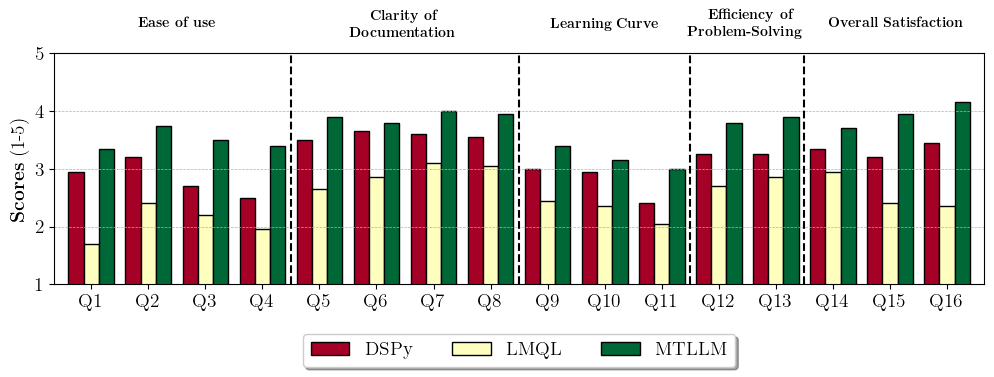

In [160]:
N = df.shape[0]
ind = np.arange(N) 

sections = {'Ease of use': ['Q1','Q2','Q3','Q4'],
            'Clarity of Documentation': ['Q5','Q6','Q7','Q8'],
            'Learning Curve': ['Q9','Q10','Q11'],
            'Efficiency of Problem-Solving': ['Q12','Q13'],
            'Overall Satisfaction': ['Q14','Q15','Q16']}
    
ax = questions_avg.plot(kind='bar', figsize=(12, 3), width=0.8, colormap='RdYlGn', edgecolor='black', linewidth=1.0, fontsize=14)
plt.yticks(ticks=[1,2,3,4,5])


offset = 0
section_positions = []
for section, Q in sections.items():
    positions = ind[offset:offset+len(Q)]
    section_positions.append((positions[0], positions[-1]))
    offset += len(Q)

for i, (start, end) in enumerate(section_positions):
    if i != 4:
        ax.axvline(x=end + 0.5, color='k', linestyle='--')

ax.set_ylabel(r"\textbf{Scores} (1-5)", fontsize=14)
plt.xticks(rotation=0)
plt.ylim(1, 5)
plt.legend(loc='lower center',shadow=True, fontsize=14, bbox_to_anchor=(0.5, -0.4), ncol=3)
height = 5.5
ax.text(1.5, height, r'\textbf{Ease of use}', ha='center', va='center', rotation=0, fontsize=10 )
ax.text(5.45, height, r'\textbf{Clarity of}\\\textbf{Documentation}', ha='center', va='center', rotation=0, fontsize=10)
ax.text(9, height, r'\textbf{Learning Curve}', ha='center', va='center', rotation=0, fontsize=10)
ax.text(11.45, height, r'\textbf{Efficiency of}\\\textbf{Problem-Solving}', ha='center', va='center', rotation=0, fontsize=10)
ax.text(14.1, height, r'\textbf{Overall Satisfaction}', ha='center', va='center', rotation=0, fontsize=10)
# Show the plot
plt.grid(axis='y',linestyle='--', linewidth=0.5)
plt.savefig('user_study_questionnaire_summary.png', dpi=300, bbox_inches='tight')
plt.show()

In [161]:
# fig = plt.plot(figsize=(10, 3))
# for i,task in enumerate(questions_avg.keys()):
#     questions_avg[task].plot(kind='bar', stacked=False, colormap='RdYlGn_r', title=task, edgecolor='black', linewidth=1.0, fontsize=14)
#     # axes[i].legend().remove()
#     # axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
    
# # legends = data['Essay Evaluator'].T.keys()
# # legends = [legend.replace('Total ', '') for legend in legends]
# # fig.legend(legends, loc='upper center',shadow=True, fontsize=14, bbox_to_anchor=(0.5, 1.13), ncol=2)
# # fig.text(0.5, -0.15, r'\textbf{LLM Programming Framework}', ha='center', va='center',fontsize=12)
# # fig.text(0.07, 0.5, r'\textbf{Success Rate}($\%$)', ha='center', va='center', rotation='vertical', fontsize=14)
# # plt.savefig('user_study_code_summary.png', dpi=300, bbox_inches='tight')
# plt.show()

In [162]:

# for question, df in questions.items():
#     means = df.mean()
#     means.plot(kind='barh')
#     plt.title(question)
#     plt.xlabel('Average')
#     plt.ylabel('Framework')
#     plt.xlim(1, 5)
#     plt.xticks([1, 2, 3, 4, 5], ['worst', 2, 3, 4, 'best'])
#     for index, value in enumerate(means):
#         plt.text(value, index, f'{value:.2f}', va='center')
#     plt.show()

In [163]:
print(questions.keys())

dict_keys(['How easy was it to set up and start using the framework?', 'How intuitive do you find the syntax and structure of the framework?', 'How would you rate the ease of performing common tasks with the framework?', 'How quickly were you able to integrate the framework into your existing projects?', 'How clear and understandable do you find the official documentation?', 'How well is the documentation structured to find information quickly?', 'How helpful are the provided examples and tutorials in understanding the framework?', 'How complete and detailed are the code examples in the documentation?', 'How would you rate the learning curve of the framework?', 'How long did it take you to feel comfortable with the basic features of the framework? Or how many days more would you expect?', 'How easy was it to learn and implement advanced features of the framework?', 'How well does the framework support users in learning and utilizing advanced concepts?', 'How efficient is the framework 

/tmp/ipykernel_5143/1194963435.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i,j].legend().remove()
/tmp/ipykernel_5143/1194963435.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i,j].legend().remove()
/tmp/ipykernel_5143/1194963435.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i,j].legend().remove()
/tmp/ipykernel_5143/1194963435.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i,j].legend().remove()
/tmp/ipykernel_5143/1194963435.py:8: UserWarning: No

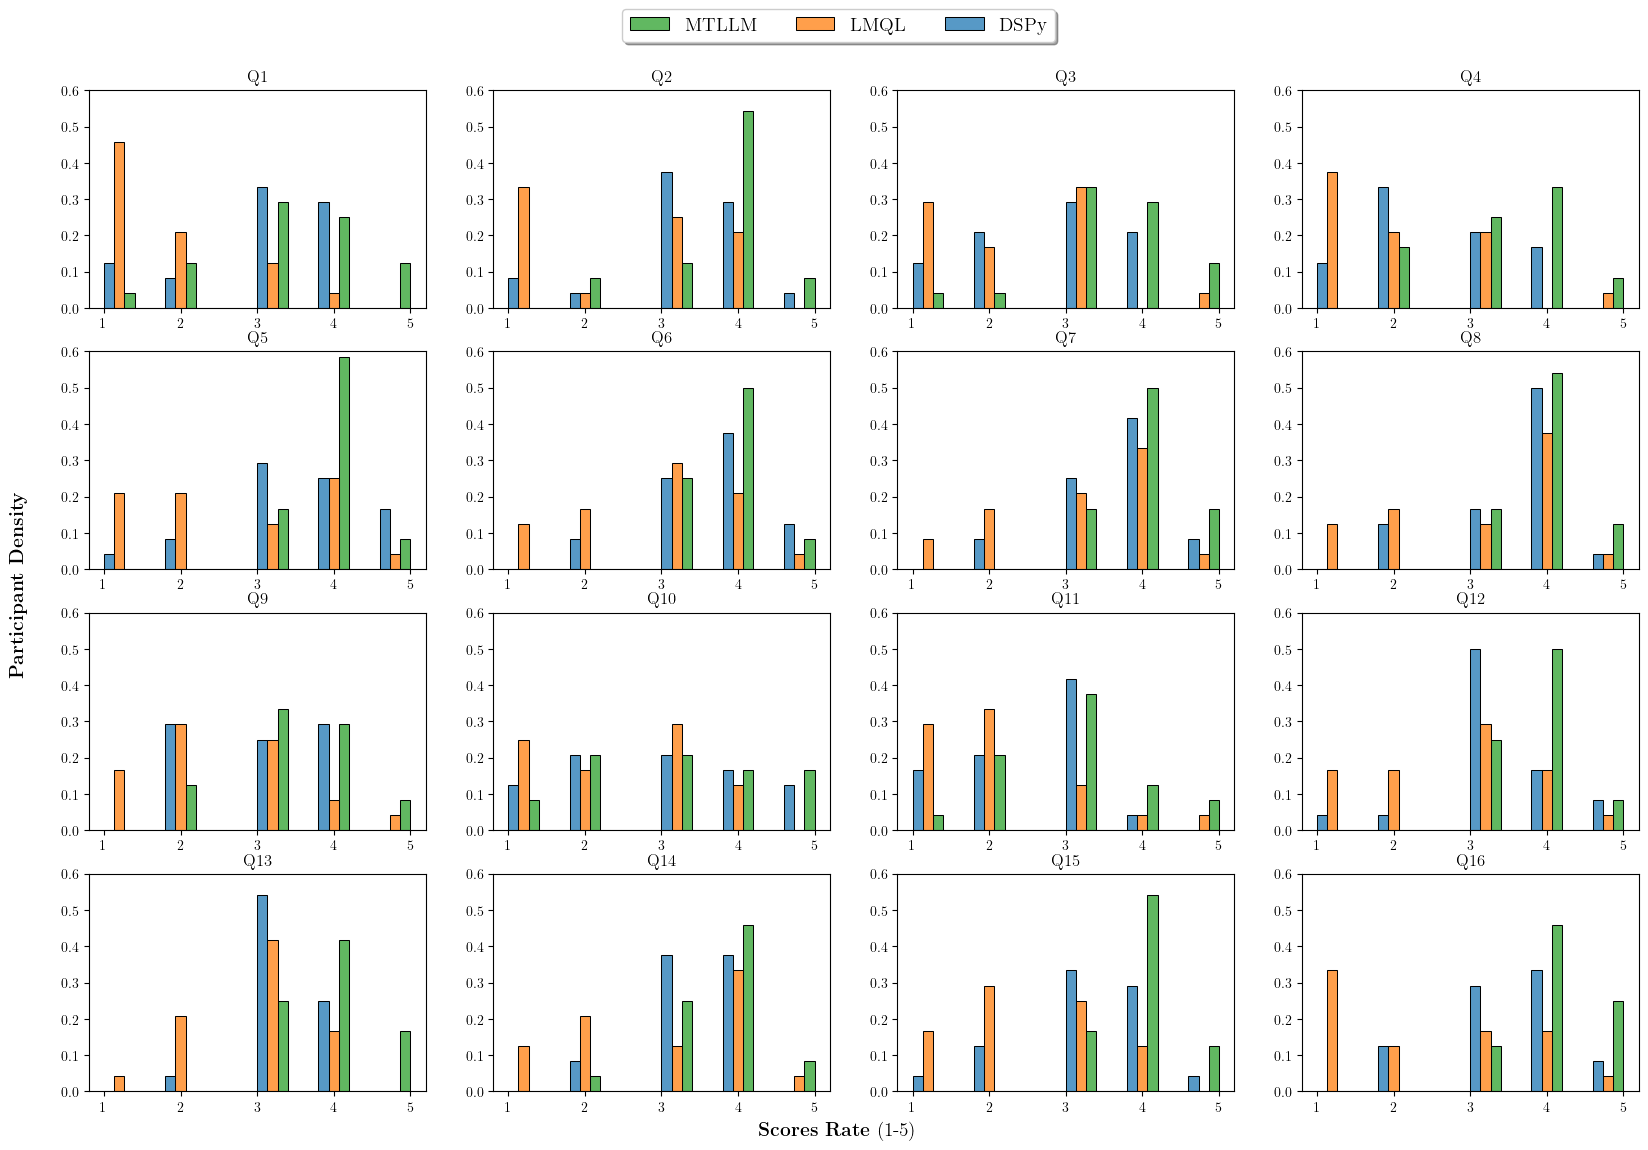

In [164]:
fig, axes = plt.subplots(4, 4, figsize=(20, 13))
Q = np.array(list(questions.keys())).reshape(4, 4)
k = 1
for i in range(0,4):
    for j in range(0,4):
        data_set = questions[Q[i,j]]
        histplot = sns.histplot(pd.melt(data_set, value_name='values', var_name='framework'), x='values', hue='framework',bins=10, stat="density", multiple="dodge",ax=axes[i,j])
        axes[i,j].legend().remove()
        axes[i,j].set_xlabel('')
        axes[i,j].set_ylabel('')
        # sns.histplot(data_set['[DSPy]'],kde=True, stat='density', bins=10, color='red', label='DSPy', alpha=0.5, multiple="dodge")
        # sns.histplot(data_set['[MTLLM]'],kde=True, stat='density', bins=10, color='green', label='MTLLM', alpha=0.5, multiple="dodge")
        # sns.histplot(data_set['[LMQL]'],kde=True, stat='density', bins=10, color='blue', label='LMQL', alpha=0.5, multiple="dodge")
        axes[i,j].set_title('Q'+str(k))
        axes[i,j].set_ylim(0,0.6)
        k += 1
        # axes[i].xlabel('Rating out of 5')
        # axes[i].ylabel('Density')
        # legend = axes[i].get_legend()
        # print(legend.legend_handles)
        # plt.legend(legend.legend_handles, ['DSPy','LMQL', 'MTLLM'], title='Framework', loc='upper right')
        # plt.tight_layout()
fig.text(0.09, 0.5, r"\textbf{Participant Density}", ha='center', va='center', rotation='vertical', fontsize=14)
fig.text(0.5, 0.08, r'\textbf{Scores Rate} (1-5)', ha='center', va='center', fontsize=14)
fig.legend(['MTLLM','LMQL','DSPy'],loc='upper center',shadow=True, fontsize=14, bbox_to_anchor=(0.5, 0.95), ncol=3)
plt.savefig('user_study_questionnaire_distribution.png', dpi=300, bbox_inches='tight')
plt.show()